In [66]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
#Loading the dataset
df = pd.read_csv(r"C:\Users\Ahmed Khan\Downloads\customer churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# replacing blanks with zero

In [69]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0")
df["Totalcharges"] = df["TotalCharges"].astype(float)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [71]:
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
Totalcharges        0
dtype: int64

In [72]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,Totalcharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [73]:
df.duplicated().sum()

0

# Convert 'SeniorCitizen' column values from 1/0 to 'yes'/'no'

In [74]:
def convo (value):
    if value == 1:
        return "yes"
    else:
        return "no"
df['SeniorCitizen'] = df['SeniorCitizen'].apply(convo)



In [75]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Totalcharges
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.85
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,1889.50
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,108.15
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1840.75
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,151.65


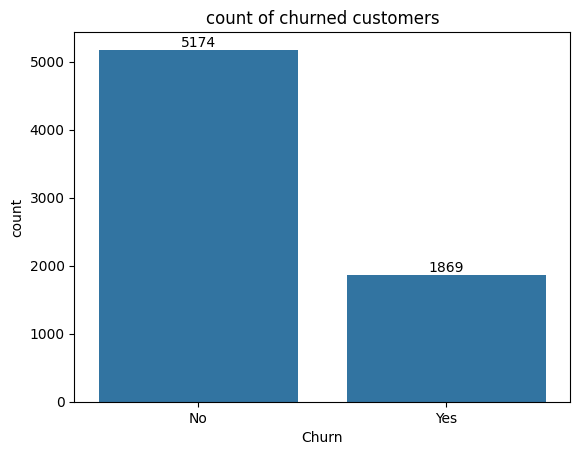

In [76]:
ax = sns.countplot(x = 'Churn', data = df)
ax.bar_label(ax.containers[0])
plt.title('count of churned customers')
plt.show()


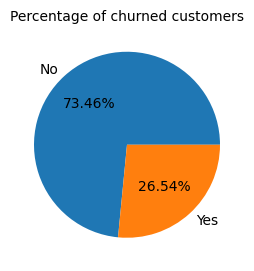

In [77]:
plt.figure(figsize = (3,4))
gb = df.groupby('Churn').aggregate({'Churn': 'count'})
gb
plt.pie(gb['Churn'] , labels = gb.index, autopct='%1.2f%%')
plt.title('Percentage of churned customers', fontsize=10)
plt.show()

# from the above pie chart we can see that 73.5% of the customers are not churned and 26.5% of the customers are churned

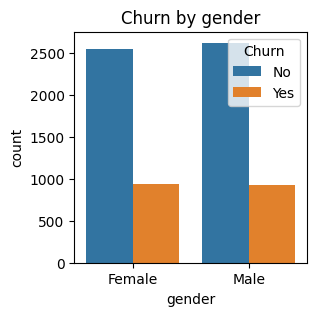

In [78]:
plt.figure(figsize=(3,3))
sns.countplot (x= 'gender',  data = df, hue= 'Churn')
plt.title('Churn by gender')
plt.show()

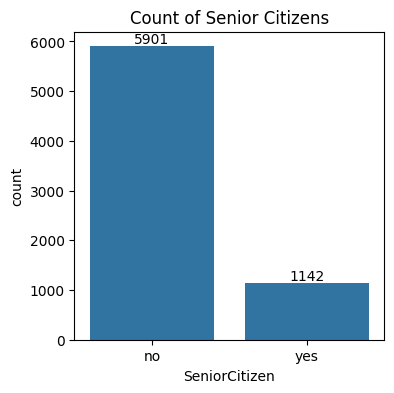

In [85]:
plt.figure(figsize=(4,4))
ax= sns.countplot (x= 'SeniorCitizen',  data = df)
ax.bar_label(ax.containers[0])
plt.title('Count of Senior Citizens')
plt.show()

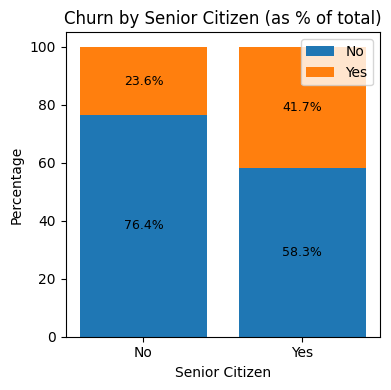

In [ ]:
# Step 1: Count values
counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)

# Step 2: Convert counts to percentages
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Step 3: Plot
fig, ax = plt.subplots(figsize=(4, 4))

bottom = [0, 0]  # To stack bars
colors = ['#1f77b4', '#ff7f0e']  # Custom colors for Churn types

# Plot each Churn class
for i, churn_value in enumerate(percentages.columns):
    ax.bar(
        percentages.index,
        percentages[churn_value],
        bottom=bottom,
        label=churn_value,
        color=colors[i]
    )
    # Add text labels
    for j, val in enumerate(percentages[churn_value]):
        if val > 0:
            ax.text(
                j,
                bottom[j] + val / 2,
                f'{val:.1f}%',
                ha='center',
                va='center',
                fontsize=9
            )
    bottom = [bottom[k] + percentages[churn_value].iloc[k] for k in range(len(bottom))]

# Customize axes
ax.set_xticks([0, 1])
ax.set_xticklabels(['No', 'Yes'])  # Assuming 0=No, 1=Yes
ax.set_xlabel('Senior Citizen')
ax.set_ylabel('Percentage')
ax.set_title('Churn by Senior Citizen (as % of total)')
ax.legend(title='Churn')
ax.legend(loc='upper right')
plt.tight_layout()
plt.show()


# Comparatively greater percentage of poeple in  senior citizen category have churned.

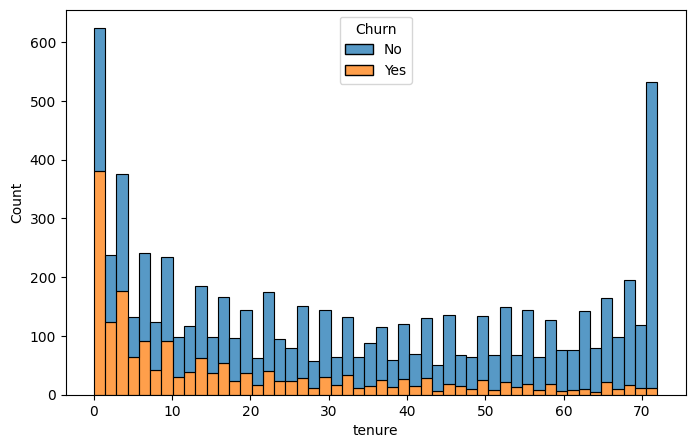

In [105]:
plt.figure(figsize=(8,5))
sns.histplot(x='tenure', data=df,hue = 'Churn', multiple = 'stack', bins=50)
plt.show()

# A stacked histogram showing customer tenure distribution, split by churn status using 50 bins.

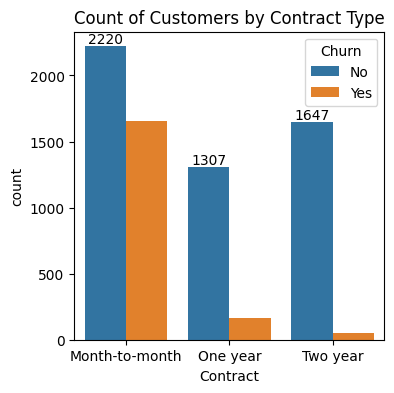

In [116]:
plt.figure(figsize=(4,4))
ax= sns.countplot (x= 'Contract',  data = df, hue = 'Churn')
ax.bar_label(ax.containers[0])
plt.title('Count of Customers by Contract Type')
plt.show()

# Most churn occurs in month-to-month contracts, while customers on one or two-year contracts are less likely to churn.

In [119]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'Totalcharges'], dtype=object)

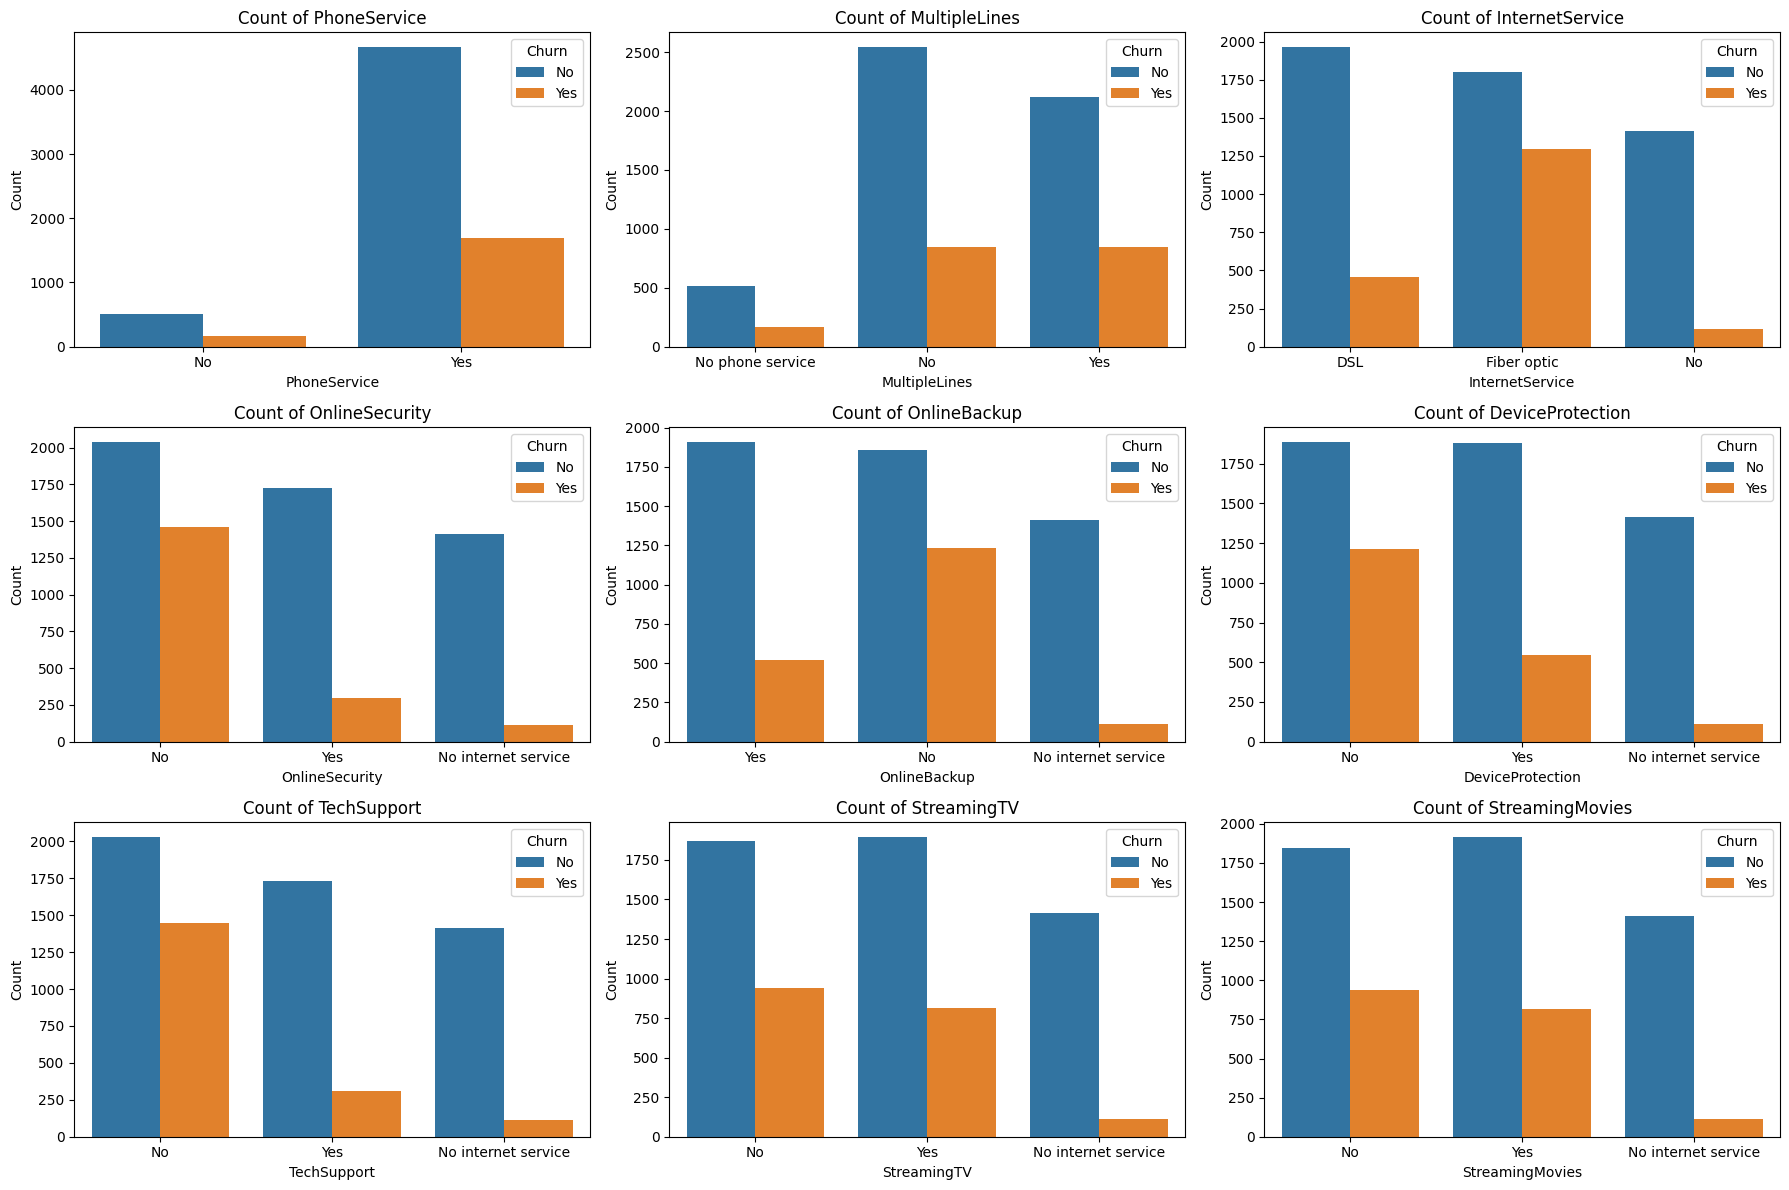

In [ ]:
# Columns to plot
cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up the subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axes = axes.flatten()

# Plot countplots
for i, col in enumerate(cols):
    sns.countplot(data=df, x=col, ax=axes[i], hue='Churn')
    axes[i].set_title(f'Count of {col}')
    axes[i].set_ylabel('Count')  # Add y-axis label
    axes[i].tick_params(axis='x', rotation=0)  # Keep x-axis labels straight

# Adjust layout
plt.tight_layout()
plt.show()


#  The majority of customer who do not churn tend to have services like PhoneService, Internetservice, Onlinesecurity enabled. For services like Onlinebackup, Techsupport and Streamintv , churn rates are noticeabily higher for customers who do not have these services enabled.

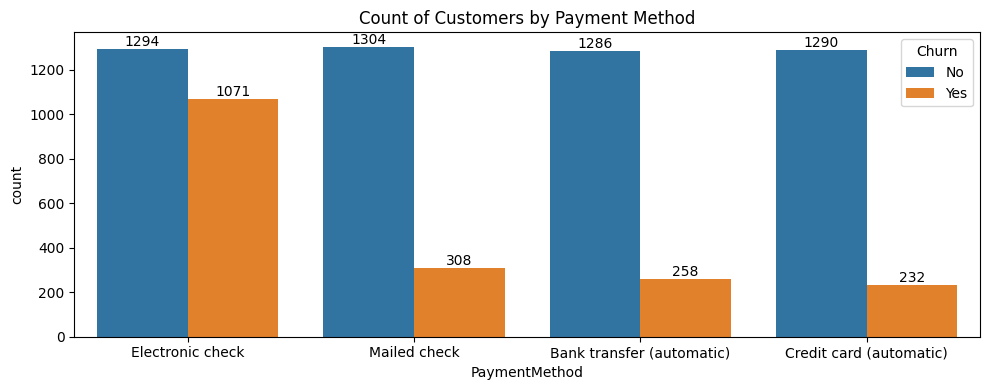

In [138]:
plt.figure(figsize=(10, 4))  # Increased width to avoid overlapping
ax = sns.countplot(x='PaymentMethod', data=df, hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Count of Customers by Payment Method')
ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()


# Customers using electronic checks have a noticeably higher churn rate compared to other payment methods.